In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# insurance_data = pd.read_csv("insurance.csv")
data = pd.read_csv("insurance_250_rows.csv")           

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# data["sex"] = data["sex"].map({"female":1,"male":0}) 

<Axes: xlabel='bmi', ylabel='charges'>

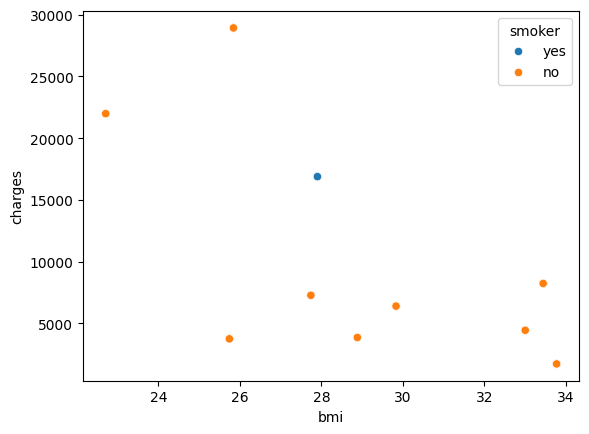

In [5]:
sns.scatterplot(x=data["bmi"],y=data["charges"],hue=data["smoker"])

In [6]:
x = data.drop(columns=["charges","region"])
y = data["charges"]

In [7]:
x["sex"] = x["sex"].replace({"female": 1, "male": 0})
x["smoker"] = x["smoker"].replace({"yes": 1, "no": 0})


x.head()
# y.head()

C:\Users\91838\AppData\Local\Temp\ipykernel_9256\2443639651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x["sex"] = x["sex"].replace({"female": 1, "male": 0})
C:\Users\91838\AppData\Local\Temp\ipykernel_9256\2443639651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x["smoker"] = x["smoker"].replace({"yes": 1, "no": 0})


,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [8]:
# train_test_model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [9]:
# x_train.head() 
x_train.head() 

,age,sex,bmi,children,smoker
132,28,0,33.00,3,0
225,31,1,25.74,0,0
238,37,0,29.83,2,0
119,60,1,25.84,0,0
136,46,1,33.44,1,0


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
y_pred = model.predict(x_test)
y_pred

array([ 2585.642899  ,  8221.2881531 ,  7423.74297341, 16884.924     ,
        2585.642899  , -3376.23797875,  7423.74297341, 10865.70152118,
       25241.86165778, 10865.70152118, 16884.924     ,  8221.2881531 ,
        8221.2881531 , 16884.924     ,  7423.74297341, 10865.70152118,
       10865.70152118,  7312.06571867,  7423.74297341, 10865.70152118,
        7423.74297341, 25241.86165778, 10865.70152118, 11954.9991678 ,
        8221.2881531 ,  7312.06571867,  7312.06571867, 16884.924     ,
       16884.924     , 16884.924     , -3376.23797875, 17818.89524553,
       -3376.23797875, 25241.86165778,  7312.06571867, -3376.23797875,
       11954.9991678 ,  8221.2881531 , 16884.924     , 25241.86165778,
       11954.9991678 ,  8221.2881531 , 11954.9991678 ,  7312.06571867,
        2585.642899  ,  8221.2881531 ,  8221.2881531 , 25241.86165778,
       17818.89524553, 11954.9991678 ])

In [12]:
x = data.drop(columns=["charges"])
y = data["charges"]

x = pd.get_dummies(x,columns=["region"],drop_first=False,dtype=int)

x["sex"] = x["sex"].map({"female":1,"male":0})
x["smoker"] = x["smoker"].map({"yes":1,"no":0})


x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# y_pred 
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
245,31,1,25.740,0,0,0,0,1,0
246,46,1,33.440,1,0,0,0,1,0
247,37,1,27.740,3,0,0,1,0,0
248,37,0,29.830,2,0,1,0,0,0


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("r2_score : ",r2)

r2_score :  0.8627564137336425


In [15]:
# intersection feature
x = data.drop(columns=["charges"])
y = data["charges"]

x = pd.get_dummies(x,columns=["region"],drop_first=True,dtype=int)
x["smoker"] = x["smoker"].map({"yes":1,"no":0})
x["sex"] = x["sex"].map({"female":1,"male":0})

x["age_smoker"] = x["smoker"] * x["age"]
x["bmi_smoker"] = x["smoker"] * x["bmi"]

x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,27.9
1,18,0,33.770,1,0,0,1,0,0,0.0
2,28,0,33.000,3,0,0,1,0,0,0.0
3,33,0,22.705,0,0,1,0,0,0,0.0
4,32,0,28.880,0,0,1,0,0,0,0.0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test,y_pred)
print("r2_score : ", r2)

r2_score :  0.8627564137336425


In [17]:
# underfit & overfit
# r2 training is low & r2 testing is also low - underfit
# r2 training >> r2 testing is also low - overfit

y_train_pred = model.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)

print("Training data r2 : ", r2_train)
print("test data r2 : ", r2)

Training data r2 :  0.8749484755946112
test data r2 :  0.8627564137336425


In [18]:
data.shape

(250, 7)